# Setup

In [1]:
#***Importing libraries***

#Math tools
import numpy as np

#Data science tools
from sklearn import svm
from sklearn.model_selection import train_test_split

#OS tools
import os

#Image processing tools
import cv2 

#Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Random seeds
np.random.seed(1)

# Custom Methods

In [3]:
### Error definition ###
def error_fn(y_true, y_pred):
    error = 0;
    for i in range(0,len(y_true)):
        if y_true[i] != y_pred[i]:
            error += 1; #Counts the number of misclassifications
    return error

# Reading the images

In [4]:
#Specifying the number of classes and images to use
n_classes = 2;
n_figs = 700;

#Specifying the total number of classes and images avaialble
N_classes = 45;
N_figs = 700;

#Randomly choosing the classes and figures to analyze
class_idx = np.random.permutation(N_classes)[:n_classes];
fig_idx = np.random.permutation(N_figs)[:n_figs]
#These two lines above generate different choices each time they're executed unless the random seed is reset

In [5]:
#Specifying the path
PROJECT_ROOT_DIR = '..'
DATASET_FOLDER = 'training_data'
DATASET_PATH = os.path.join(PROJECT_ROOT_DIR,DATASET_FOLDER)


#Reading the folders tree
classes_all = sorted(os.listdir(DATASET_PATH));
classes_all.remove('summary'); #Removes the summary file
N_classes = len(classes_all)
if n_classes > 0 and n_classes <= N_classes:
    classes = [classes_all[idx] for idx in class_idx]
else:
    print('Wrong number of classes requested')
    raise SystemExit(0)
    
#Reading the figures
figs = [];
for folder in classes:
    CLASS_PATH = os.path.join(DATASET_PATH, folder);
    figs_names_all = sorted(os.listdir(CLASS_PATH));
    if n_figs > 0 and n_figs <= N_figs:
        figs_names = [figs_names_all[idx] for idx in fig_idx]
        FIGS_PATHS = [os.path.join(CLASS_PATH, fig) for fig in figs_names]
        figs_i = [cv2.imread(PATH,0) for PATH in FIGS_PATHS]; #cv2.imread with flag 0 reads the image in grayscale
        figs.append(figs_i)
    else:
        print('Wrong number of figures requested')
        raise SystemExit(0)

#Converting into a numpy array
figs = np.array(figs);
print('figs.shape')
print(figs.shape)

##***Output***
# figs: Multidimensional numpy array containing all read images. First dimension corresponds to class and second dimension to figures. 
#Each figure is a multidimensional array itself of 256x256 pixels and only the greyscale channel: int(0,255)

figs.shape
(2, 700, 256, 256)


In [6]:
#Shows the names of the chosen classes and their corresponding indexes in figs
print('Chosen classes:')
print(list(enumerate(classes)))

Chosen classes:
[(0, 'basketball_court'), (1, 'baseball_diamond')]


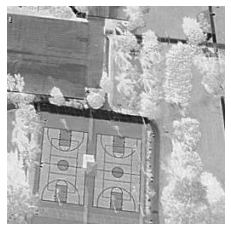

In [7]:
#Visualizing some of the data
fig_test = figs[0][0];
plt.imshow(fig_test, cmap = mpl.cm.binary); plt.axis("off");

# Preparing the data set

In [8]:
#Linearizing the input data
X = figs.reshape([n_classes*n_figs, 256, 256]); #Inputs
y = np.zeros([n_classes, n_figs], dtype=int);
for i in range (n_classes):
    for j in range(n_figs):
        y[i,j] = i;
y = y.reshape([n_classes*n_figs]); #Labels

In [9]:
#Shuffling the input data
idx_random = np.random.permutation(len(X));
X = X[idx_random,:,:];
y = y[idx_random]

0
basketball_court


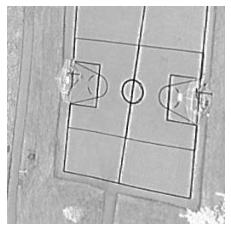

In [10]:
#Visualizing some of the data
idx = 5;
X_test = X[idx];
plt.imshow(X_test, cmap = mpl.cm.binary); plt.axis("off");
print(y[idx])
print(classes[y[idx]])

In [12]:
#Reshaping the dataset to a 2D array
X = X.reshape(-1, 256*256);
X.shape

(1400, 65536)

In [13]:
#Splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, random_state=0)
N_train = len(X_train)
N_test = len(X_test)

In [17]:
X_train.shape

(1050, 65536)

# Training the SVM classifier

In [22]:
#Setting up the models
C = 1  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C))
titles = ('SVM with linear kernel',
          'SVM with polynomial (degree 2) kernel',
          'SVM with polynomial (degree 3) kernel',
          'SVM with RBF kernel')
#Training 
models = (clf.fit(X_train, y_train) for clf in models)

## Training error

In [19]:
i = 0;
error = np.zeros(len(titles))
for clf in models:       
    y_pred = clf.predict(X_train)
    error[i] = error_fn(y_train, y_pred)
    i += 1
print('*** Training error ***')
print('N_train: '+str(N_train))
i = 0
for title in titles:
    print(title+': '+str(error[i]))
    i += 1

*** Training error ***
N_train: 1050
SVC with linear kernel: 0.0
SVC with polynomial (degree 2) kernel: 0.0
SVC with polynomial (degree 3) kernel: 0.0
SVC with RBF kernel: 0.0


In [20]:
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [21]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

## Generalization error

In [23]:
### Computing the generalization error ###
i = 0;
error = np.zeros(len(titles))
for clf in models:
    y_pred_test = clf.predict(X_test)
    error[i] = error_fn(y_test, y_pred_test)
    i += 1
print('*** Generalization error ***')
print('N_test: '+str(N_test))
i = 0
for title in titles:
    print(title+': '+str(error[i]))
    i += 1

*** Generalization error ***
N_test: 350
SVC with linear kernel: 173.0
SVC with polynomial (degree 2) kernel: 170.0
SVC with polynomial (degree 3) kernel: 174.0
SVC with RBF kernel: 181.0


In [24]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [25]:
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

> ***The model is clearly overfitted!!!!***

# Best k-rank approximation through PCA

**Key questions**
- How to efficiently apply SVD to a batch of images and make decision about the number of modes to use? 
- Do we apply SVD to each input image or to the training dataset as a whole?
- What could be the optimum number of principal components to use? Which metric do we use to compare them?

In [ ]:
<code>

# Reduced input space through random projection (maybe?)

**Key questions**
- What kind of information/improvements would we get this way compared to PCA?

In [ ]:
<code>